In [1]:
import warnings
warnings.filterwarnings('ignore')

TARGET = 'Pressure'
DISCOVERY_TIMEOUT_SECONDS=2800
ESTIMATION_TIMEOUT_SECONDS=1800
REFUTATION_GLOBAL_TIMEOUT_SECONDS=1800
REFUTATION_MODEL_TIMEOUT_SECONDS=240

# Dataset and Knowledge settings

In [2]:
import pandas as pd

df = pd.read_csv('./resources/airfoil_self_noise/data.csv')
df['Frequency'] = df['Frequency'].astype(float)
df

,Frequency,Attack,Chord,Velocity,Displacement,Pressure
0,800.0,0.0,0.3048,71.3,0.0027,126.201
1,1000.0,0.0,0.3048,71.3,0.0027,125.201
2,1250.0,0.0,0.3048,71.3,0.0027,125.951
3,1600.0,0.0,0.3048,71.3,0.0027,127.591
4,2000.0,0.0,0.3048,71.3,0.0027,127.461
...,...,...,...,...,...,...
1498,2500.0,15.6,0.1016,39.6,0.0528,110.264
1499,3150.0,15.6,0.1016,39.6,0.0528,109.254
1500,4000.0,15.6,0.1016,39.6,0.0528,106.604
1501,5000.0,15.6,0.1016,39.6,0.0528,106.224


In [3]:
df.describe()

,Frequency,Attack,Chord,Velocity,Displacement,Pressure
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011134,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000400,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002500,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.005000,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015550,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058400,140.987000


In [4]:
from causal_nest.knowledge import parse_knowledge_file

knowledge = parse_knowledge_file('./resources/airfoil_self_noise/knowledge.txt')
knowledge

Knowledge(required_edges=[], forbidden_edges=[('Frequency', 'Attack'), ('Attack', 'Velocity'), ('Pressure', 'Velocity'), ('Displacement', 'Chord'), ('Pressure', 'Displacement'), ('Velocity', 'Chord'), ('Pressure', 'Frequency'), ('Displacement', 'Velocity'), ('Pressure', 'Attack'), ('Chord', 'Velocity'), ('Frequency', 'Chord'), ('Displacement', 'Attack'), ('Chord', 'Attack'), ('Velocity', 'Attack'), ('Frequency', 'Velocity'), ('Attack', 'Chord'), ('Pressure', 'Chord')])

In [5]:
from causal_nest.dataset import MissingDataHandlingMethod, Dataset, handle_missing_data, FeatureTypeMap, FeatureType, estimate_feature_importances

feature_mapping = [FeatureTypeMap(feature=c, type=FeatureType.CONTINUOUS) for c in df.drop(TARGET, axis=1).columns]

dataset = Dataset(data=df, target=TARGET, feature_mapping=feature_mapping)
dataset = handle_missing_data(dataset, MissingDataHandlingMethod.FORWARD_FILL)
dataset = estimate_feature_importances(dataset)
dataset

Dataset(data=      Frequency  Attack   Chord  Velocity  Displacement  Pressure
0         800.0     0.0  0.3048      71.3        0.0027   126.201
1        1000.0     0.0  0.3048      71.3        0.0027   125.201
2        1250.0     0.0  0.3048      71.3        0.0027   125.951
3        1600.0     0.0  0.3048      71.3        0.0027   127.591
4        2000.0     0.0  0.3048      71.3        0.0027   127.461
...         ...     ...     ...       ...           ...       ...
1498     2500.0    15.6  0.1016      39.6        0.0528   110.264
1499     3150.0    15.6  0.1016      39.6        0.0528   109.254
1500     4000.0    15.6  0.1016      39.6        0.0528   106.604
1501     5000.0    15.6  0.1016      39.6        0.0528   106.224
1502     6300.0    15.6  0.1016      39.6        0.0528   104.204

[1503 rows x 6 columns], target='Pressure', feature_mapping=[FeatureTypeMap(feature='Displacement', type=<FeatureType.CONTINUOUS: 3>, importance=0.4250397277069429), FeatureTypeMap(feature='Freq

In [6]:
from causal_nest.problem import Problem

problem = Problem(dataset=dataset, description='Airfoil Self Noise', knowledge=knowledge)
problem

Problem(dataset=Dataset(data=      Frequency  Attack   Chord  Velocity  Displacement  Pressure
0         800.0     0.0  0.3048      71.3        0.0027   126.201
1        1000.0     0.0  0.3048      71.3        0.0027   125.201
2        1250.0     0.0  0.3048      71.3        0.0027   125.951
3        1600.0     0.0  0.3048      71.3        0.0027   127.591
4        2000.0     0.0  0.3048      71.3        0.0027   127.461
...         ...     ...     ...       ...           ...       ...
1498     2500.0    15.6  0.1016      39.6        0.0528   110.264
1499     3150.0    15.6  0.1016      39.6        0.0528   109.254
1500     4000.0    15.6  0.1016      39.6        0.0528   106.604
1501     5000.0    15.6  0.1016      39.6        0.0528   106.224
1502     6300.0    15.6  0.1016      39.6        0.0528   104.204

[1503 rows x 6 columns], target='Pressure', feature_mapping=[FeatureTypeMap(feature='Displacement', type=<FeatureType.CONTINUOUS: 3>, importance=0.4250397277069429), FeatureTypeM

## Checking the Feature infered importance

In [7]:
problem.dataset.feature_mapping

[FeatureTypeMap(feature='Displacement', type=<FeatureType.CONTINUOUS: 3>, importance=0.4250397277069429),
 FeatureTypeMap(feature='Frequency', type=<FeatureType.CONTINUOUS: 3>, importance=0.3913651434514641),
 FeatureTypeMap(feature='Chord', type=<FeatureType.CONTINUOUS: 3>, importance=0.09271175694204456),
 FeatureTypeMap(feature='Attack', type=<FeatureType.CONTINUOUS: 3>, importance=0.04566685435722941),
 FeatureTypeMap(feature='Velocity', type=<FeatureType.CONTINUOUS: 3>, importance=0.04521651754231891)]

# Causal Discovery

In [8]:
from causal_nest.discovery import applyable_models

models = applyable_models(problem)
models

[causal_nest.discovery_models.pc.PC,
 causal_nest.discovery_models.gs.GS,
 causal_nest.discovery_models.ccdr.CCDR,
 causal_nest.discovery_models.iamb.IAMB,
 causal_nest.discovery_models.sam.SAM,
 causal_nest.discovery_models.bes.BES,
 causal_nest.discovery_models.grasp.GRASP,
 causal_nest.discovery_models.cgnn.CGNN]

In [9]:
from causal_nest.discovery import discover_with_all_models

problem = discover_with_all_models(problem, max_seconds_model=DISCOVERY_TIMEOUT_SECONDS)
problem.discovery_results

  0%|          | 0/1000 [00:00<?, ?it/s]


GRaSP completed in: 0.47s 


 92%|█████████▏| 922/1000 [23:34<02:01,  1.55s/it, disc=0.486, gen=-.0826, regul_loss=0.0667, tot=-4.27]

{'PC': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada3f220>, model='PC', auc_pr=None, shd=None, sid=None, runtime=24.507208166993223, priority_score=2.5, knowledge_integrity_score=0.8823529411764706, forbidden_edges_violation_rate=0.11764705882352941, required_edges_compliance_rate=1.0),
 'GS': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada2bd90>, model='GS', auc_pr=None, shd=None, sid=None, runtime=5.364899729000172, priority_score=1.6666666666666667, knowledge_integrity_score=0.7058823529411764, forbidden_edges_violation_rate=0.29411764705882354, required_edges_compliance_rate=1.0),
 'CCDR': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada2bf40>, model='CCDR', auc_pr=None, shd=None, sid=None, runtime=7.650975055992603, priority_score=1.3749999999999998, knowledge_integrity_score=0.6470588235294117, forbidden_edges_violation_rate=0.35294117647058826, required_edges_compliance_rate

In [10]:
list(sorted(filter(lambda x: x, problem.discovery_results.values()), key=lambda x: x.priority_score, reverse=True))

[DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada3f220>, model='PC', auc_pr=None, shd=None, sid=None, runtime=24.507208166993223, priority_score=2.5, knowledge_integrity_score=0.8823529411764706, forbidden_edges_violation_rate=0.11764705882352941, required_edges_compliance_rate=1.0),
 DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada2bd90>, model='GS', auc_pr=None, shd=None, sid=None, runtime=5.364899729000172, priority_score=1.6666666666666667, knowledge_integrity_score=0.7058823529411764, forbidden_edges_violation_rate=0.29411764705882354, required_edges_compliance_rate=1.0),
 DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada2bbe0>, model='IAMB', auc_pr=None, shd=None, sid=None, runtime=4.633652948992676, priority_score=1.6666666666666667, knowledge_integrity_score=0.7058823529411764, forbidden_edges_violation_rate=0.29411764705882354, required_edges_compliance_rate=1.0),
 DiscoveryRes

# Causal Estimation

In [11]:
from causal_nest.estimation import estimate_all_effects

problem = estimate_all_effects(problem, verbose=True, max_seconds_model=ESTIMATION_TIMEOUT_SECONDS)
problem.estimation_results

{'PC': [EstimationResult(model='PC', treatment='Displacement', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff13750ee0>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff13766a30>, control_value=0, treatment_value=1, p_value=array([5.76991816e-18])),
  EstimationResult(model='PC', treatment='Frequency', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff13779f40>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff137813a0>, control_value=0, treatment_value=1, p_value=array([0.0831579])),
  EstimationResult(model='PC', treatment='Chord', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff1378c130>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff1378c670>, control_value=0, treatment_value=1, p_value=array([2.00860161e-12])),
  EstimationResult(model='PC', treatment='Attack', estimand=<dowhy.causal_identifier.identified_estiman

In [12]:
for m, er in problem.estimation_results.items():
    print('\n\n\nModel: ', m)
    for r in er:
        print(r.treatment, ': ', r.estimate.value)




Model:  PC
Displacement :  -168.2142484312181
Frequency :  -0.0009389834536364106
Chord :  -15.841799806966591
Attack :  -0.6664317648799454
Velocity :  0.05586351887203023



Model:  GS
Displacement :  -168.2142484312181
Frequency :  -0.0008807707599487458
Chord :  -15.977330752656869
Attack :  -0.6664317648799454
Velocity :  0



Model:  IAMB
Displacement :  -168.2142484312181
Frequency :  -0.0008807707599487458
Chord :  -15.977330752656869
Attack :  -0.6664317648799454
Velocity :  0



Model:  CCDR
Displacement :  -159.5648922845318
Frequency :  -0.001128151623930762
Chord :  0
Attack :  0.19565832360825652
Velocity :  0.05516610555274326



Model:  BES
Displacement :  0
Frequency :  -0.0008549790125016443
Chord :  0
Attack :  0
Velocity :  0.05541984290981361


# Refutation

In [13]:
from causal_nest.refutation import refute_all_results

problem = refute_all_results(problem, max_seconds_global=REFUTATION_GLOBAL_TIMEOUT_SECONDS, max_seconds_model=REFUTATION_MODEL_TIMEOUT_SECONDS)
problem.refutation_results

e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable


{'PC': [RefutationResult(treatment='Velocity', estimated_effect=0.05586351887203023, p_value=0.9199999999999999, new_effect=0.0004763569204969542, model='PlaceboPermute', runtime=14.96901319999597, passed=True),
  RefutationResult(treatment='Velocity', estimated_effect=0.05586351887203023, p_value=0.8400000000000001, new_effect=0.055855756082137734, model='RandomCommonCause', runtime=21.20211029499478, passed=True),
  RefutationResult(treatment='Velocity', estimated_effect=0.05586351887203023, p_value=0.98, new_effect=0.05577536540430955, model='SubsetRemoval', runtime=26.292189107989543, passed=True),
  RefutationResult(treatment='Frequency', estimated_effect=-0.0009389834536364106, p_value=0.92, new_effect=-5.472149869945042e-07, model='PlaceboPermute', runtime=19.256293065991485, passed=True),
  RefutationResult(treatment='Frequency', estimated_effect=-0.0009389834536364106, p_value=0.94, new_effect=-0.0009389385675351036, model='RandomCommonCause', runtime=22.32379977700475, passed

# Output Graphs

In [14]:
from causal_nest.result import generate_all_results


graphs = generate_all_results(problem)
graphs

{'PC': 'digraph G {\nfontname="Helvetica,Arial,sans-serif";\nnode[style="filled", fontsize=20, penwidth=2.5, fixedsize=true, fontcolor="black", fillcolor="gray", color="black", shape="circle"];\nedge[penwidth=2, minlen=2];\nsplines="polyline";\n   "Displacement"[width=1, height=1, label="Displacement\n-168.21", fillcolor="lightpink"];\n   "Frequency"[width=1, height=1, label="Frequency\n-0.00", fillcolor="lightpink"];\n   "Chord"[width=1, height=1, label="Chord\n-15.84", fillcolor="lightpink"];\n   "Attack"[width=1, height=1, label="Attack\n-0.67", fillcolor="lightpink"];\n   "Velocity"[width=1, height=1, label="Velocity\n0.06", fillcolor="#4CAF50", fontcolor="white"];\n   "Pressure"[width=1, height=1, label="Pressure", fillcolor="magenta", color="purple", shape="hexagon", fontcolor="white"];\n   "Displacement" -> "Pressure"[color=black];\n   "Frequency" -> "Attack"[color=red];\n   "Frequency" -> "Pressure"[color=black];\n   "Chord" -> "Displacement"[color=black];\n   "Chord" -> "Attac

PC


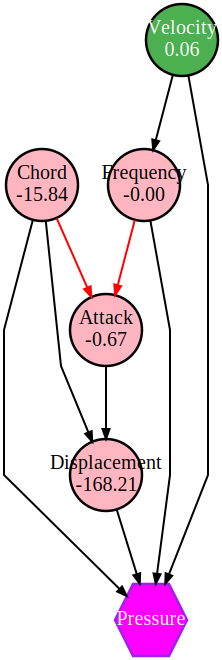

GS


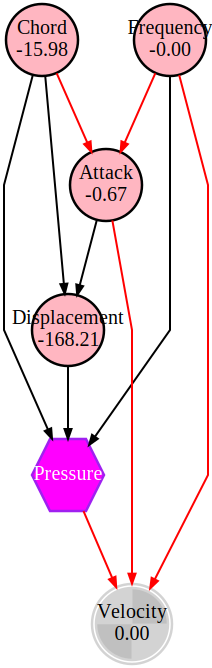

CCDR


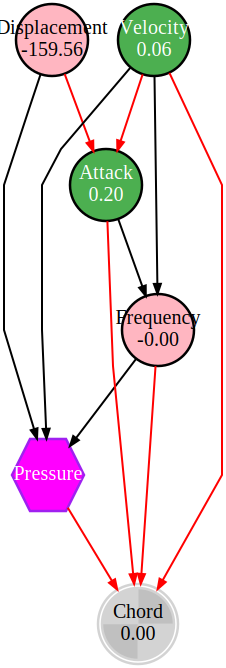

IAMB


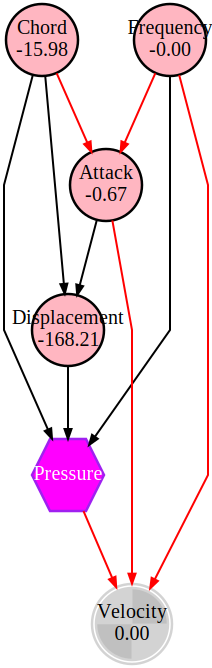

SAM
No graph
BES


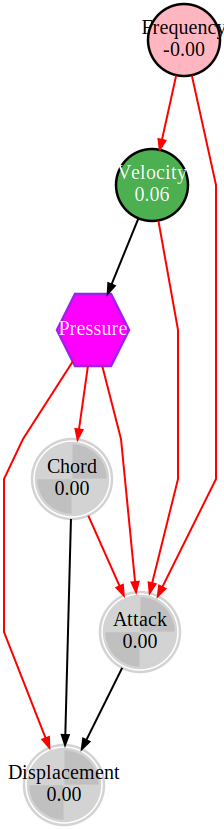

GRASP
No graph
CGNN
No graph


In [15]:
from graphviz import Source

for k, v in graphs.items():
    print(k)

    if v is None: 
        print('No graph')
    else:
        display(Source(v))